In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import pyplot
%matplotlib inline

In [2]:
df=pd.read_csv('covid_19_india.csv')
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
16845,16846,2021-07-07,8:00 AM,Telangana,-,-,613124,3703,628282
16846,16847,2021-07-07,8:00 AM,Tripura,-,-,63964,701,68612
16847,16848,2021-07-07,8:00 AM,Uttarakhand,-,-,332006,7338,340882
16848,16849,2021-07-07,8:00 AM,Uttar Pradesh,-,-,1682130,22656,1706818


In [3]:
df.shape

(16850, 9)

In [4]:
df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [5]:
df.drop(['Sno', 'Time'], axis=1, inplace=True)
df

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,1,0,0,0,1
1,2020-01-31,Kerala,1,0,0,0,1
2,2020-02-01,Kerala,2,0,0,0,2
3,2020-02-02,Kerala,3,0,0,0,3
4,2020-02-03,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...
16845,2021-07-07,Telangana,-,-,613124,3703,628282
16846,2021-07-07,Tripura,-,-,63964,701,68612
16847,2021-07-07,Uttarakhand,-,-,332006,7338,340882
16848,2021-07-07,Uttar Pradesh,-,-,1682130,22656,1706818


In [6]:
df.isnull().sum()

Date                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [7]:
df.isna().sum()

Date                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16850 entries, 0 to 16849
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Date                      16850 non-null  object
 1   State/UnionTerritory      16850 non-null  object
 2   ConfirmedIndianNational   16850 non-null  object
 3   ConfirmedForeignNational  16850 non-null  object
 4   Cured                     16850 non-null  int64 
 5   Deaths                    16850 non-null  int64 
 6   Confirmed                 16850 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 921.6+ KB


In [9]:
df.describe()

,Cured,Deaths,Confirmed
count,1.685000e+04,16850.000000,1.685000e+04
mean,2.360353e+05,3485.222552,2.583667e+05
std,5.225438e+05,9330.541749,5.672808e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,2.658500e+03,22.000000,3.644750e+03
50%,2.889500e+04,453.000000,3.336150e+04
75%,2.537510e+05,3071.250000,2.666530e+05
max,5.872268e+06,123531.000000,6.113335e+06


In [10]:
statewise_data = df.groupby('State/UnionTerritory')['Confirmed','Cured','Deaths'].sum().reset_index()
statewise_data["Cured_percentage"] = ((statewise_data["Cured"] / statewise_data["Confirmed"]) * 100)
statewise_data

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,State/UnionTerritory,Confirmed,Cured,Deaths,Cured_percentage
0,Andaman and Nicobar Islands,1675248,1589935,22624,94.907441
1,Andhra Pradesh,324146783,303427899,2475816,93.608178
2,Arunachal Pradesh,5598324,5150519,19303,92.001088
3,Assam,80418492,74011348,459575,92.032748
4,Bihar,106881540,100131380,756282,93.684447
5,Bihar****,1430909,1402468,18881,98.012382
6,Cases being reassigned to states,345565,0,0,0.000000
7,Chandigarh,8691806,7980284,119356,91.813876
8,Chhattisgarh,128751782,117163544,1591126,90.999551
9,Dadra and Nagar Haveli,20722,20352,8,98.214458


In [11]:
df['Active'] = df['Confirmed'] - df['Cured'] - df['Deaths']
df.tail()

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active
16845,2021-07-07,Telangana,-,-,613124,3703,628282,11455
16846,2021-07-07,Tripura,-,-,63964,701,68612,3947
16847,2021-07-07,Uttarakhand,-,-,332006,7338,340882,1538
16848,2021-07-07,Uttar Pradesh,-,-,1682130,22656,1706818,2032
16849,2021-07-07,West Bengal,-,-,1472132,17834,1507241,17275


In [12]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Active
0,2020-01-30,Kerala,1,0,0,0,1,1
1,2020-01-31,Kerala,1,0,0,0,1,1
2,2020-02-01,Kerala,2,0,0,0,2,2
3,2020-02-02,Kerala,3,0,0,0,3,3
4,2020-02-03,Kerala,3,0,0,0,3,3


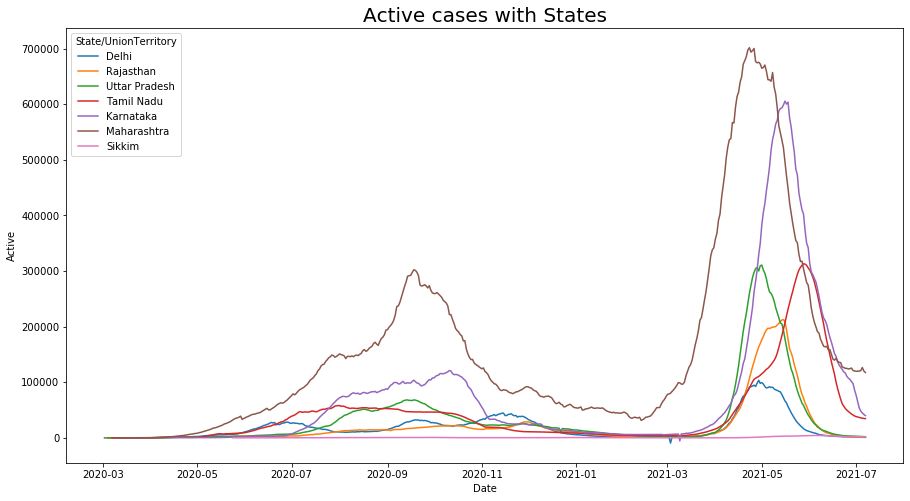

In [13]:
fig=plt.figure(figsize=(15,8))
ax=sns.lineplot(data=df[df['State/UnionTerritory'].isin(['Delhi','Uttar Pradesh','Maharashtra','Sikkim','Tamil Nadu','Rajasthan','Karnataka'])],x='Date',y='Active',hue='State/UnionTerritory')
ax.set_title("Active cases with States", size=20)
plt.show()

In [14]:
df_cases = df[df['Date'] == df['Date'].max()].copy().fillna(0)
df_cases.index = df_cases["State/UnionTerritory"]
df_cases=df_cases.drop(["State/UnionTerritory",'Date','ConfirmedIndianNational','ConfirmedForeignNational'],axis=1)
df_cases.head()

,Cured,Deaths,Confirmed,Active
State/UnionTerritory,,,,
Andaman and Nicobar Islands,7343,128,7487,16
Andhra Pradesh,1861937,12898,1908065,33230
Arunachal Pradesh,34525,181,37879,3173
Assam,493306,4717,522267,24244
Bihar,711913,9612,722746,1221


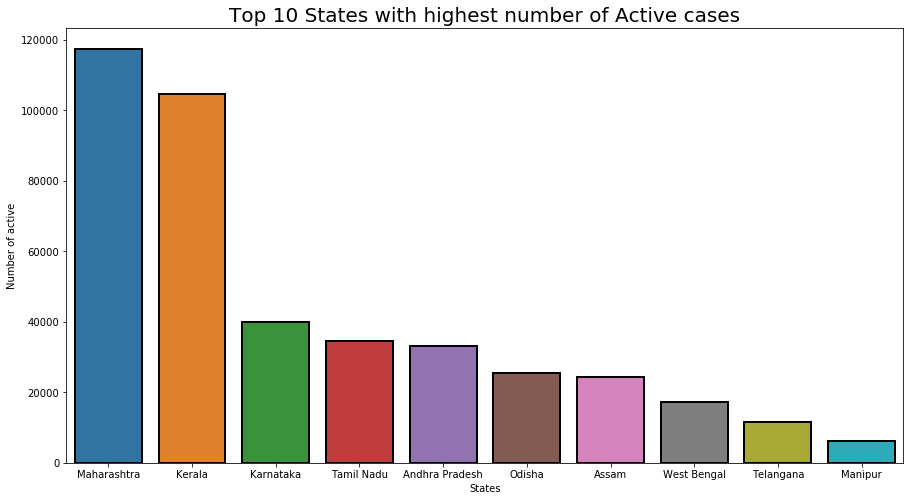

In [15]:
top10states_active = df_cases.sort_values('Active',ascending = False)[:10]
fig=plt.figure(figsize=(15,8))
plt.title("Top 10 States with highest number of Active cases", size=20)
plt.xlabel("states")
plt.ylabel("Number of active cases in thousands")
ax=sns.barplot(data=top10states_active.iloc[:10],y=top10states_active.Active,x=top10states_active.index, linewidth=2, edgecolor='black').set(xlabel='States', ylabel='Number of active')
plt.show()

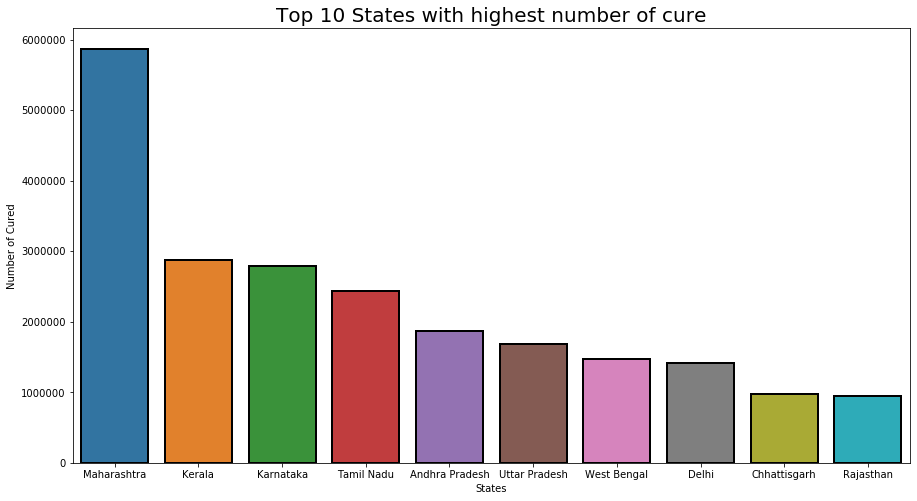

In [16]:
top10states_cure = df_cases.sort_values('Cured',ascending = False)[:10]
fig=plt.figure(figsize=(15,8))
plt.title("Top 10 States with highest number of cure", size=20)
plt.xlabel("states")
plt.ylabel("Number of cures in thousands")
ax=sns.barplot(data=top10states_cure.iloc[:10],y=top10states_cure.Cured,x=top10states_cure.index, linewidth=2, edgecolor='black').set(xlabel='States', ylabel='Number of Cured')
plt.show()

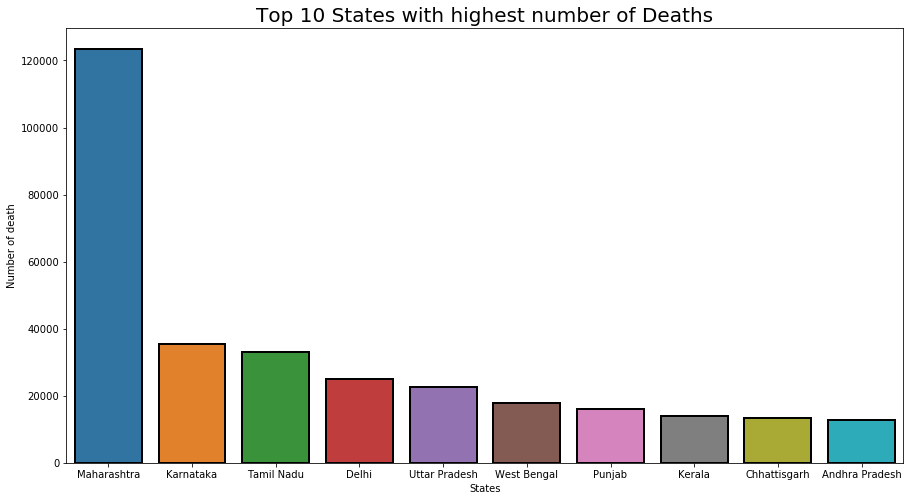

In [17]:
top10states_death = df_cases.sort_values('Deaths',ascending = False)[:10]
fig=plt.figure(figsize=(15,8))
plt.title("Top 10 States with highest number of Deaths", size=20)
plt.xlabel("states")
plt.ylabel("Number of cures in thousands")
ax=sns.barplot(data=top10states_death.iloc[:10],y=top10states_death.Deaths,x=top10states_death.index, linewidth=2, edgecolor='black').set(xlabel='States', ylabel='Number of death')
plt.show()

In [18]:
Statewise_testing=pd.read_csv('StatewiseTestingDetails.csv')
Statewise_testing

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0
...,...,...,...,...,...
15108,2021-07-02,West Bengal,14325099.0,NaN,NaN
15109,2021-07-03,West Bengal,14377860.0,NaN,NaN
15110,2021-07-04,West Bengal,14430084.0,NaN,NaN
15111,2021-07-05,West Bengal,14470472.0,NaN,NaN


In [19]:
Statewise_testing['Date']=pd.to_datetime(Statewise_testing['Date'])
Statewise_testing.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


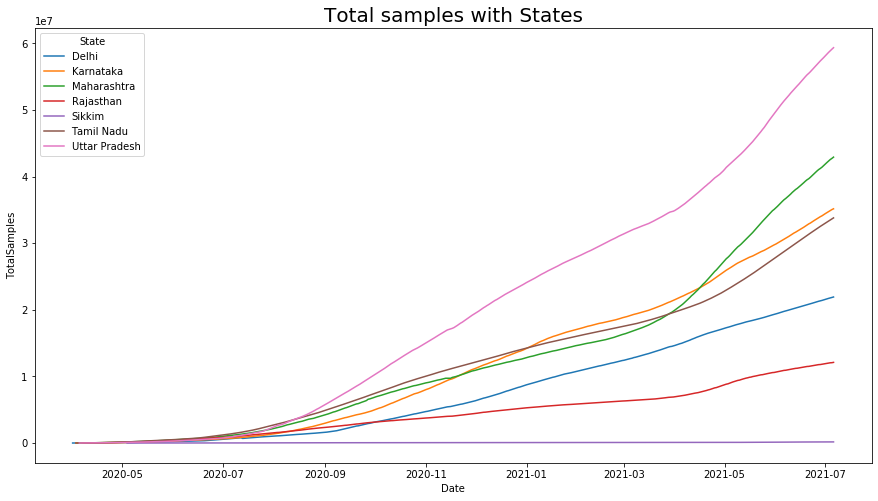

In [20]:
fig=plt.figure(figsize=(15,8))
ax=sns.lineplot(data=Statewise_testing[Statewise_testing['State'].isin(['Delhi','Uttar Pradesh','Maharashtra','Sikkim','Tamil Nadu','Rajasthan','Karnataka'])],x='Date',y='TotalSamples',hue='State')
ax.set_title("Total samples with States", size=20)
plt.show()

In [21]:
df_positive = Statewise_testing[Statewise_testing['Date'] == Statewise_testing['Date'].max()].copy().fillna(0)
df_positive.index = df_positive["State"]
df_positive=df_positive.drop(["State",'Date','Negative'],axis=1)
df_positive.tail()

,TotalSamples,Positive
State,,
Telangana,19274985.0,0.0
Tripura,1326395.0,68148.0
Uttar Pradesh,59331655.0,0.0
Uttarakhand,5677464.0,0.0
West Bengal,14516751.0,0.0


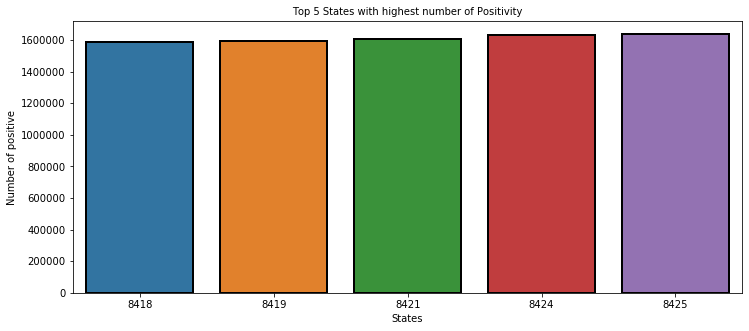

In [22]:
topstates_positive = Statewise_testing.sort_values('Positive',ascending = False)[:5]
fig=plt.figure(figsize=(12,5))
plt.title("Top 5 States with highest number of Positivity", size=10)
plt.xlabel("states")
plt.ylabel("Number of positive in thousands")
ax=sns.barplot(data=topstates_positive.iloc[:5],y=topstates_positive.Positive,x=topstates_positive.index, linewidth=2, edgecolor='black').set(xlabel='States', ylabel='Number of positive')
plt.show()

In [24]:
vc=pd.read_csv('covid_vaccine_statewise.csv')
vc.head()

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Sputnik V Administered,AEFI,18-45 years (Age),45-60 years (Age),60+ years (Age),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,NaN,NaN,NaN,NaN,NaN,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,NaN,NaN,NaN,NaN,NaN,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,NaN,NaN,NaN,NaN,NaN,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,NaN,NaN,NaN,NaN,NaN,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,NaN,NaN,NaN,NaN,NaN,251280.0


In [25]:
vc.isnull().sum()

Updated On                                0
State                                     0
Total Doses Administered                335
Total Sessions Conducted                336
Total Sites                             336
First Dose Administered                 336
Second Dose Administered                336
Male(Individuals Vaccinated)            336
Female(Individuals Vaccinated)          336
Transgender(Individuals Vaccinated)     336
Total Covaxin Administered              336
Total CoviShield Administered           336
Total Sputnik V Administered           4962
AEFI                                   2519
18-45 years (Age)                      2522
45-60 years (Age)                      2521
60+ years (Age)                        2521
Total Individuals Vaccinated            336
dtype: int64

In [26]:
vc=vc.drop(['Total Sputnik V Administered','AEFI','18-45 years (Age)','45-60 years (Age)','60+ years (Age)'],axis=1)
vc

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,251280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6694,11/07/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6695,12/07/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6696,13/07/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6697,14/07/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
vc.head()

,Updated On,State,Total Doses Administered,Total Sessions Conducted,Total Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Covaxin Administered,Total CoviShield Administered,Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,23757.0,24517.0,2.0,579.0,47697.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,27348.0,31252.0,4.0,635.0,57969.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,41361.0,58083.0,5.0,1299.0,98150.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,81901.0,113613.0,11.0,3017.0,192508.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,98111.0,153145.0,24.0,3946.0,247334.0,251280.0


In [28]:
trans=vc['Transgender(Individuals Vaccinated)'].sum()
Male=vc['Male(Individuals Vaccinated)'].sum()
Female=vc['Female(Individuals Vaccinated)'].sum()

In [29]:
total=trans+Male+Female
total

34926020060.0

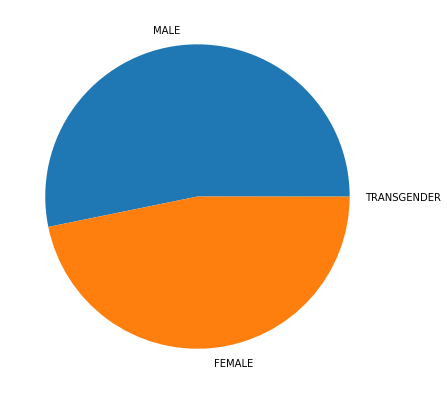

In [30]:
people = ['MALE', 'FEMALE', 'TRANSGENDER']
DT = [Male, Female, trans]
fig = plt.figure(figsize =(10, 7))
plt.pie(DT, labels = people)
plt.show()

In [31]:
covis=vc['Total Covaxin Administered'].sum()
covax=vc['Total CoviShield Administered'].sum()
VTotal=covis+covax

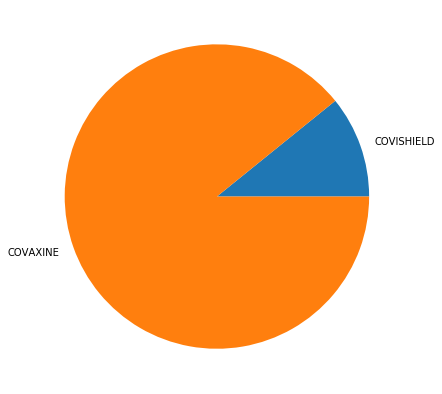

In [32]:
vaccine = ['COVISHIELD', 'COVAXINE']
DT = [covis, covax]
fig = plt.figure(figsize =(10, 7))
plt.pie(DT, labels = vaccine)
plt.show()

In [33]:
first_dose=vc['First Dose Administered'].sum()
second_dose=vc['Second Dose Administered'].sum()
Total_daose=first_dose+second_dose

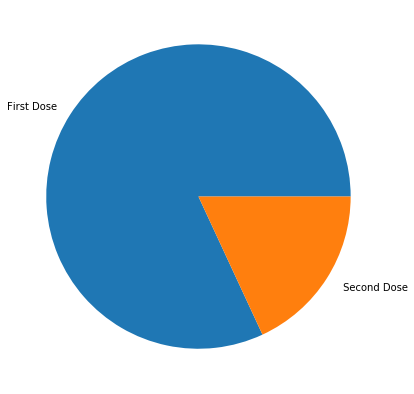

In [34]:
Dose=['First Dose', ' Second Dose']
no=[first_dose,second_dose]
fig = plt.figure(figsize =(10, 7))
plt.pie(no, labels = Dose)
plt.show()